<a href="https://colab.research.google.com/github/jagapathi479/Data-exploration-and-visualization/blob/main/Digit-Recognizer-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8807 - loss: 0.4325 - val_accuracy: 0.9607 - val_loss: 0.1307
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9659 - loss: 0.1192 - val_accuracy: 0.9695 - val_loss: 0.1003
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9753 - loss: 0.0794 - val_accuracy: 0.9751 - val_loss: 0.0785
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9826 - loss: 0.0559 - val_accuracy: 0.9751 - val_loss: 0.0761
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9867 - loss: 0.0422 - val_accuracy: 0.9770 - val_loss: 0.0729
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.0888

Test Accuracy: 0.9769999980926514
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


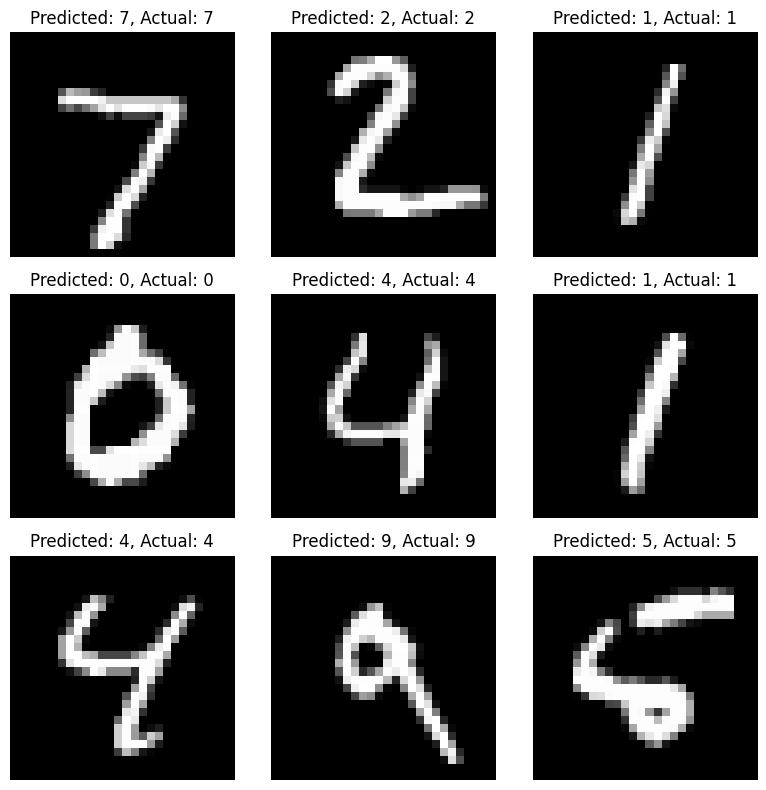

In [5]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input
import matplotlib.pyplot as plt

# Step 2: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Step 3: Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 4: Build Neural Network
model = Sequential([
    Input(shape=(28, 28)), # Flatten 28x28 image into 784 pixels
    Flatten(),
    Dense(128, activation='relu'),          # Hidden layer with 128 neurons
    Dense(10, activation='softmax')         # Output layer for 10 classes (digits 0–9)
])

# Step 5: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 7: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

# Step 8: Visualize some predictions
predictions = model.predict(x_test)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
